# **libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Loading Data**

In [30]:
data = pd.read_csv("WineQT.csv")
df = pd.DataFrame(data)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [31]:
df.shape

(1143, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# **Data Preprocessing**

In [34]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [35]:
print(df.duplicated().sum())

0


In [36]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


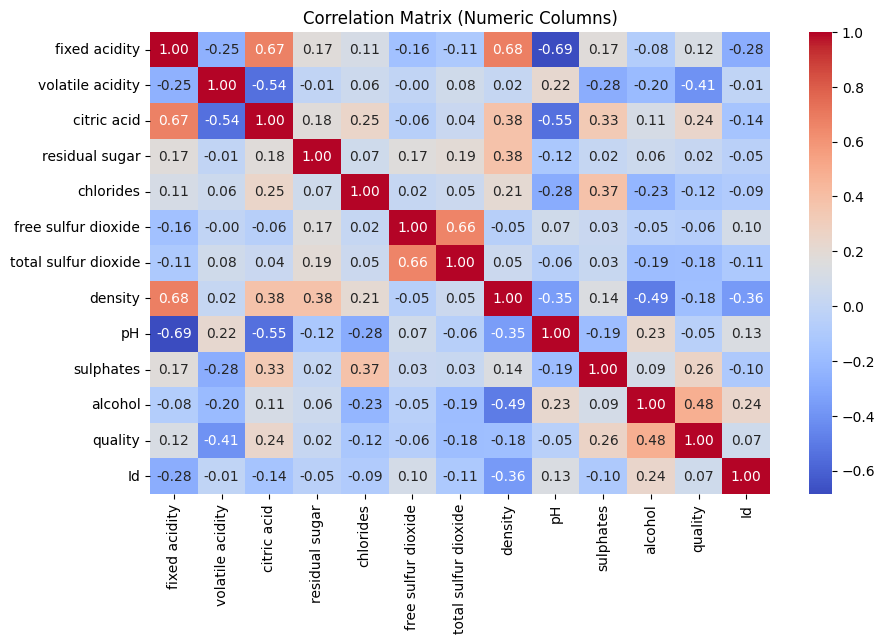

In [37]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

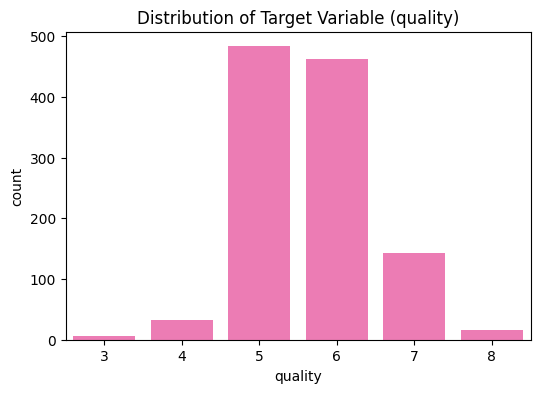

In [38]:
# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, color='hotpink')
plt.title('Distribution of Target Variable (quality)')
plt.show()

In [39]:
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [40]:
# Performing Feature Selecting

# We'll use features are most correlated with quality for this analysis
X = df[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']]
#convert quality to binary classification 0,1
df['label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
y = df['label']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Visualizing**

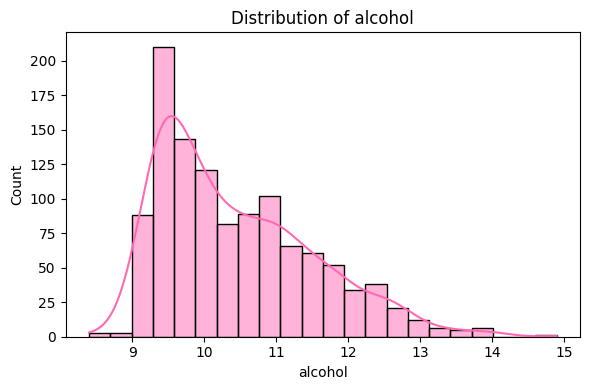

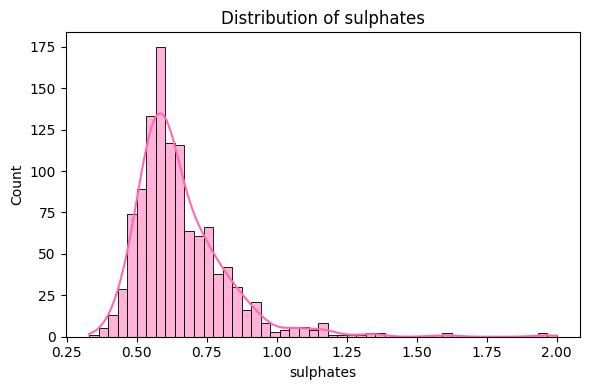

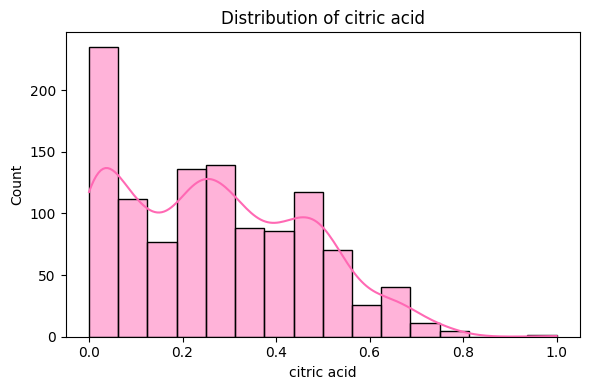

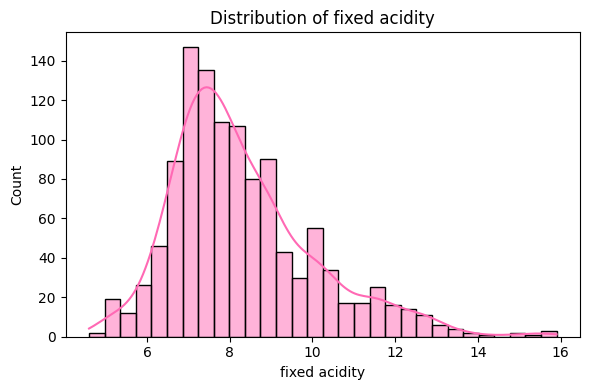

In [41]:
# Histograms for all numeric features
for col in X:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True,color='hotpink')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# **SVM Implementation**


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid for RBF kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Define parameter grid for Linear kernel
linear_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear']
}

# Define parameter grid for Polynomial kernel
poly_param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 0.01],
    'kernel': ['poly']
}

# Create GridSearchCV objects
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, cv=5)
grid_linear = GridSearchCV(SVC(), linear_param_grid, cv=5)
grid_poly = GridSearchCV(SVC(), poly_param_grid, cv=5)

# Fit GridSearchCV to training data
grid_rbf.fit(X_train_scaled, y_train)
grid_linear.fit(X_train_scaled, y_train)
grid_poly.fit(X_train_scaled, y_train)

print("Best Parameters for RBF SVM:", grid_rbf.best_params_)
print("Best Parameters for Linear SVM:", grid_linear.best_params_)
print("Best Parameters for Polynomial SVM:", grid_poly.best_params_)

Best Parameters for RBF SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Parameters for Linear SVM: {'C': 0.1, 'kernel': 'linear'}
Best Parameters for Polynomial SVM: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [43]:
# Train SVM Models using the best parameters with probability=True
svm_models = {
    "SVC (RBF kernel)": SVC(kernel='rbf', C=grid_rbf.best_params_['C'], gamma=grid_rbf.best_params_['gamma'], probability=True),
    "Linear SVM": SVC(kernel='linear', C=grid_linear.best_params_['C'], probability=True),
    "Polynomial SVM": SVC(kernel='poly', C=grid_poly.best_params_['C'], degree=grid_poly.best_params_['degree'], gamma=grid_poly.best_params_['gamma'], probability=True)
}


SVM Models:

SVC (RBF kernel) - Training Accuracy: 0.7875, Test Accuracy: 0.7493
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       152
           1       0.80      0.73      0.76       191

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.76      0.75      0.75       343



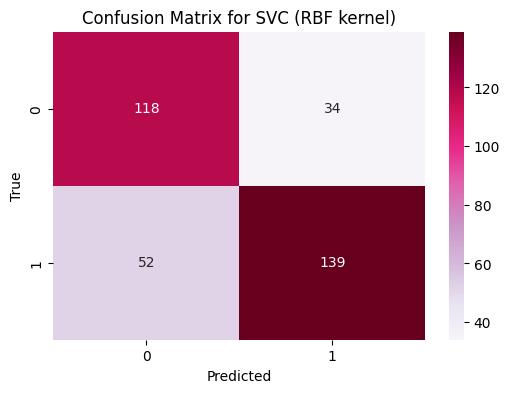

Linear SVM - Training Accuracy: 0.7137, Test Accuracy: 0.7347
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       152
           1       0.80      0.70      0.75       191

    accuracy                           0.73       343
   macro avg       0.74      0.74      0.73       343
weighted avg       0.74      0.73      0.74       343



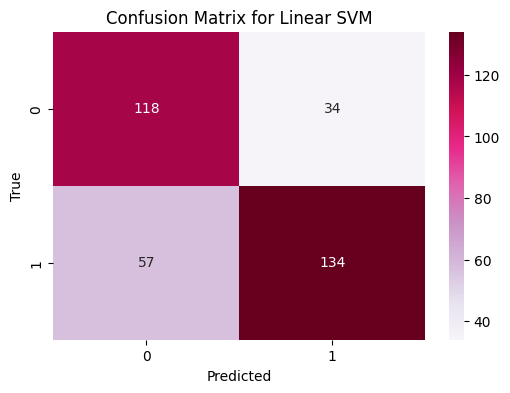

Polynomial SVM - Training Accuracy: 0.7500, Test Accuracy: 0.7726
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       152
           1       0.78      0.82      0.80       191

    accuracy                           0.77       343
   macro avg       0.77      0.77      0.77       343
weighted avg       0.77      0.77      0.77       343



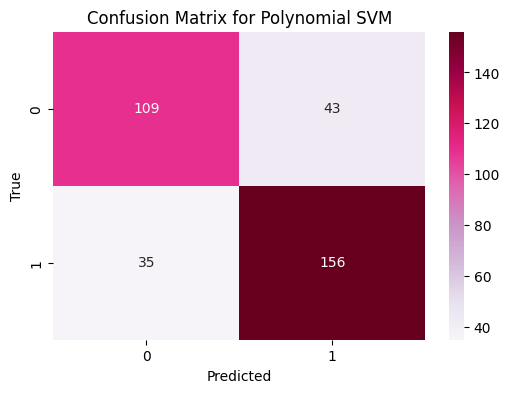

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nSVM Models:\n")
for name, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    # Accuracy on test data
    y_pred_test = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    # Accuracy on training data
    y_pred_train = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred_test, zero_division=0))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# **Neural Network Implementation**

In [45]:
#!pip install --upgrade --force-reinstall numpy==1.24.3
#!pip install --upgrade --force-reinstall tensorflow==2.13.0

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
]

activations = ['relu', 'sigmoid', 'tanh']
models = {}
histories = {}
results_NT = {}

# Create, train and evaluate models with different activation functions
for activation in activations:
    print(f"\nTraining model with {activation} activation:")

    models[activation] = Sequential([
        Dense(32, activation=activation, input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(16, activation=activation),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    models[activation].compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    histories[activation] = models[activation].fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=callbacks,
        verbose=1
    )

    loss, accuracy = models[activation].evaluate(X_test, y_test, verbose=0)
    y_pred_prob = models[activation].predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

    results_NT[activation] = {
        'test_accuracy': accuracy,
        'test_loss': loss,
        'y_pred': y_pred,
        'y_pred_prob': y_pred_prob,
        'val_loss': min(histories[activation].history['val_loss']),
        'val_accuracy': max(histories[activation].history['val_accuracy'])
    }

    print(f"{activation.capitalize()} Model Test Accuracy: {accuracy:.4f}")


Training model with relu activation:
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4956 - loss: 0.8661 - val_accuracy: 0.6000 - val_loss: 0.7372 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5326 - loss: 0.7365 - val_accuracy: 0.6000 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6775 - loss: 0.6609 - val_accuracy: 0.6000 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6751 - loss: 0.6411 - val_accuracy: 0.6000 - val_loss: 0.8515 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6442 - loss: 0.6497 - val_accuracy: 0.6000 - val_loss: 0.8017 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6205 - val_accuracy: 0.6000 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6751 - loss: 0.6322 - val_accuracy: 0.6000 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4505 - loss: 0.9372 - val_accuracy: 0.6000 - val_loss: 0.6742 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5710 - loss: 0.7181 - val_accuracy: 0.6000 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6350 - loss: 0.6447 - val_accuracy: 0.6000 - val_loss: 0.6778 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6803 - loss: 0.6081 - val_accuracy: 0.6000 - val_loss: 0.6802 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6748 - loss: 0.6520 - val_accuracy: 0.6000 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6694 - loss: 0.6090 - val_accuracy: 0.6000 - val_loss: 0.6779 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6978 - loss: 0.6041 - val_accuracy: 0.6000 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6060 - loss: 0.8232 - val_accuracy: 0.6000 - val_loss: 0.7239 - learning_rate: 0.0010
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6213 - loss: 0.7314 - val_accuracy: 0.6000 - val_loss: 0.8000 - learning_rate: 0.0010
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6554 - loss: 0.6803 - val_accuracy: 0.6000 - val_loss: 0.8465 - learning_rate: 0.0010
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6798 - loss: 0.6372 - val_accuracy: 0.6000 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6734 - loss: 0.6487 - val_accuracy: 0.6000 - val_loss: 0.8400 - learning_rate: 0.0010
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7019 - loss: 0.6275 - val_accuracy: 0.6000 - val_loss: 0.8405 - learning_rate: 0.0010
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6698 - loss: 0.6536 - val_accuracy: 0.6000 - 

In [47]:
print("\nSummary of Results:")
for activation in activations:
    print(f"{activation.capitalize()} - Test Accuracy: {results_NT[activation]['test_accuracy']:.4f}, "
        f"Test Loss: {results_NT[activation]['test_loss']:.4f}, "
        f"Best Val Accuracy: {results_NT[activation]['val_accuracy']:.4f}, "
        f"Best Val Loss: {results_NT[activation]['val_loss']:.4f}")


Summary of Results:
Relu - Test Accuracy: 0.7464, Test Loss: 0.5548, Best Val Accuracy: 0.7563, Best Val Loss: 0.5555
Sigmoid - Test Accuracy: 0.7434, Test Loss: 0.5395, Best Val Accuracy: 0.7563, Best Val Loss: 0.5392
Tanh - Test Accuracy: 0.5569, Test Loss: 0.7787, Best Val Accuracy: 0.6000, Best Val Loss: 0.7239


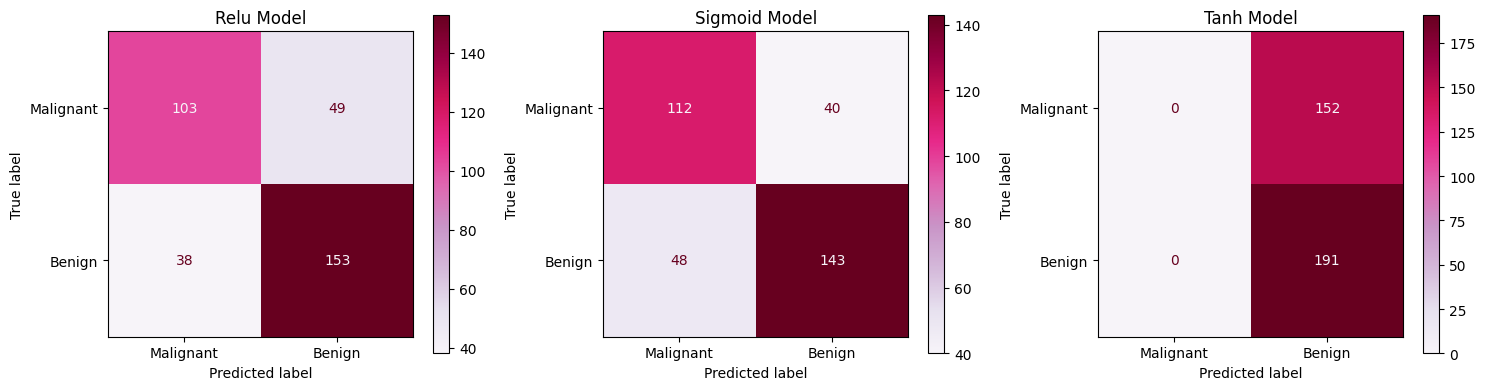

In [48]:
# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, activation in enumerate(activations):
    cm = confusion_matrix(y_test, results_NT[activation]['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    disp.plot(ax=axes[i], cmap='PuRd', values_format='d')
    axes[i].set_title(f'{activation.capitalize()} Model')
plt.tight_layout()
plt.show()

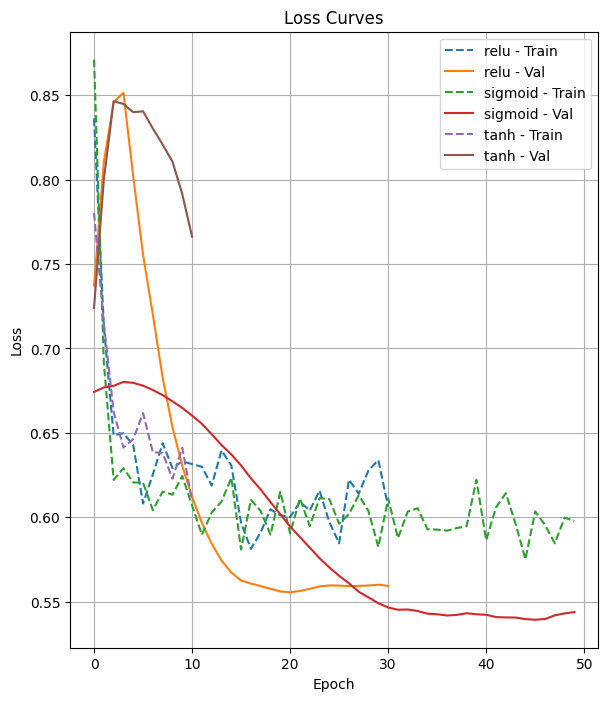

In [49]:
# Plot all loss curves in one figure
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
for activation, history in histories.items():
    plt.plot(history.history['loss'], linestyle='--', label=f'{activation} - Train')
    plt.plot(history.history['val_loss'], label=f'{activation} - Val')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

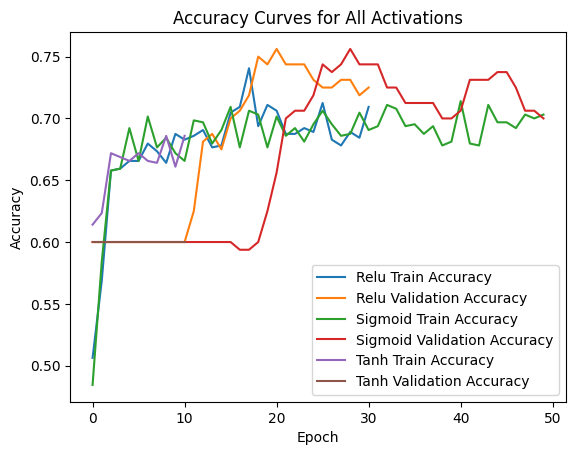

In [50]:
#accuracy curves
plt.figure()
for activation in activations:
    plt.plot(histories[activation].history['accuracy'], label=f'{activation.capitalize()} Train Accuracy')
    plt.plot(histories[activation].history['val_accuracy'], label=f'{activation.capitalize()} Validation Accuracy')
plt.title('Accuracy Curves for All Activations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
# Find best model
best_activation = min(results_NT.items(), key=lambda x: x[1]['val_loss'])[0]
print(f"\nBest performing activation function: {best_activation} (validation loss: {results_NT[best_activation]['val_loss']:.4f})")
# Print classification report for best model
print(f"\nClassification Report for Best Model ({best_activation.capitalize()}):")
print(classification_report(y_test, results_NT[best_activation]['y_pred'], target_names=['Class 0', 'Class 1']))


Best performing activation function: sigmoid (validation loss: 0.5392)

Classification Report for Best Model (Sigmoid):
              precision    recall  f1-score   support

     Class 0       0.70      0.74      0.72       152
     Class 1       0.78      0.75      0.76       191

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.75      0.74      0.74       343



# **Model Comparison and Analysis**

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics functions
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc

In [59]:
# --- Metrics ---

def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }

svm_model = svm_models["Polynomial SVM"]  # Get the Polynomial SVM model

svm_preds = svm_model.predict(X_test_scaled) # Generate predictions

svm_metrics = get_metrics(y_test, svm_preds)
nn_metrics = get_metrics(y_test, results_NT[best_activation]['y_pred'])

In [60]:
# --- Print metrics ---
print("SVM Metrics:",svm_metrics)
print("Neural Network Metrics:",nn_metrics)

SVM Metrics: {'accuracy': 0.7725947521865889, 'precision': 0.7839195979899497, 'recall': 0.8167539267015707, 'f1_score': 0.8}
Neural Network Metrics: {'accuracy': 0.7434402332361516, 'precision': 0.7814207650273224, 'recall': 0.7486910994764397, 'f1_score': 0.7647058823529411}


In [61]:
# Get predicted probabilities
#svm_proba = svm_models["Polynomial SVM)"].predict_proba(X_test_scaled)[:, 1]
svm_model = svm_models["Polynomial SVM"]  # Get the RBF kernel SVM model
svm_model.fit(X_train_scaled, y_train)
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1


nn_proba = results_NT[best_activation]['y_pred_prob']# Assuming 'model' is your Neural Network

# --- Plot ROC Curves ---
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_proba)
auc_svm = auc(fpr_svm, tpr_svm)
auc_nn = auc(fpr_nn, tpr_nn)


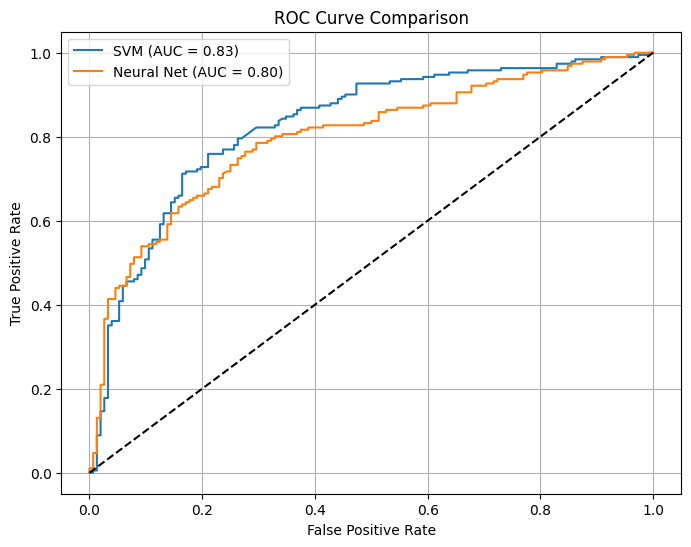

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Net (AUC = {auc_nn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# **Analysis Tips:**
**After running the above:**

**Compare** **F1-scores**: Best metric when classes are imbalanced.

**Inspect** **AUCs**: Higher AUC = better model distinction.

**Check** validation vs training loss (NN) to detect overfitting.

**Tweak** architecture/hyperparameters if either model underperforms.